In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import pandas as pd

In [42]:
AP_S1={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S2={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S3={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S4={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S5={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S6={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S7={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}
AP_S8={'Sample':['A0806S11','A0806S12'],
            'Before Blank':['A0806_B1','A0806_B2'],
            'After Blank':['A0806_B3','A0806_B5'],
         'Vol':200,
         'Diameter':[22.41,22.44,21.45]}

In [43]:
AD_S1={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S2={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S3={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S4={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S5={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S6={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S7={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}
AD_S8={'Sample':['D0806-S1','D0806-S2'],
            'Before Blank':['D0806-B1','D0806-B2'],
            'After Blank':['D0806-B3','D0806-B4'],}


In [3]:
ap_path='/Users/zhenjia/Desktop/Airka_Reprocess/Ariake/2015/2015.08.06/ap/'
ad_path='/Users/zhenjia/Desktop/Airka_Reprocess/Ariake/2015/2015.08.06/ad/'

In [45]:
ap_list = [AP_S1,
          AP_S2,
          AP_S3,
          AP_S4,
          AP_S5,
          AP_S6,
          AP_S7,
          AP_S8, ]

In [44]:
ad_list = [AD_S1,
          AD_S2,
          AD_S3,
          AD_S4,
          AD_S5,
          AD_S6,
          AD_S7,
          AD_S8, ]

想一下这个程序的逻辑

1. 计算AP 存下来，画图

2. 计算AD 需要用到之前AP里面的Vol和Area，存下来，画图

3.计算Aph, ap-ad，存下来，画图



有一个原则就是尽量少输入

所以Vol和Area只在只在之前的Ap进行单次输入

出图是单个站点出图

存数据是所有数据一起存

In [13]:
def ASC_read(path,name):
    f=path+name+'.ASC'
    ASC=pd.read_csv(f,names=['wave','data'])
    data=ASC['data'].to_numpy()
    return data

In [51]:
def ap_batch(ap_path,aplist,filename):
    ap_bacth = []
    area_list=[]
    vol_list=[]
    for station in aplist:
        apB1=ASC_read(ap_path,station['Before Blank'][0])
        apB2=ASC_read(ap_path,station['Before Blank'][1])
        apB3=ASC_read(ap_path,station['After Blank'][0])
        apB4=ASC_read(ap_path,station['After Blank'][1])

        apS1=ASC_read(ap_path,station['Sample'][0])
        apS2=ASC_read(ap_path,station['Sample'][1])
        Diameter=AP_S1['Diameter']
        vol=AP_S1['Vol']
        area=np.pi*(np.mean(Diameter)**2)/4
        area_list.append(area)
        vol_list.append(vol)
        ap_bacth.append(ap_ad_single(apB1,apB2,apB3,apB4,apS1,apS2,vol,area))

    ap_bacth = np.asarray(ap_bacth)
    f = path + filename + '.csv'
    appd = pd.DataFrame(ap_bacth.T)
    appd.to_csv(f)
    return ap_bacth,area_list,vol_list

In [14]:
apB1=ASC_read(ap_path,AP_S1['Before Blank'][0])
apB2=ASC_read(ap_path,AP_S1['Before Blank'][1])
apB3=ASC_read(ap_path,AP_S1['After Blank'][0])
apB4=ASC_read(ap_path,AP_S1['After Blank'][1])

apS1=ASC_read(ap_path,AP_S1['Sample'][0])
apS2=ASC_read(ap_path,AP_S1['Sample'][1])
Diameter=AP_S1['Diameter']
vol=AP_S1['Vol']

In [15]:
adB1=ASC_read(ad_path,AD_S1['Before Blank'][0])
adB2=ASC_read(ad_path,AD_S1['Before Blank'][1])
adB3=ASC_read(ad_path,AD_S1['After Blank'][0])
adB4=ASC_read(ad_path,AD_S1['After Blank'][1])

adS1=ASC_read(ad_path,AD_S1['Sample'][0])
adS2=ASC_read(ad_path,AD_S1['Sample'][1])

In [52]:
def ad_batch(ad_path,adlist,filename,area_list,vol_list):
    ad_bacth = []
    for i in range(len(area_list)):
        station=ad_list[i]
        adB1=ASC_read(ad_path,station['Before Blank'][0])
        adB2=ASC_read(ad_path,station['Before Blank'][1])
        adB3=ASC_read(ad_path,station['After Blank'][0])
        adB4=ASC_read(ad_path,station['After Blank'][1])

        adS1=ASC_read(ad_path,station['Sample'][0])
        adS2=ASC_read(ad_path,station['Sample'][1])

        vol=vol_list[i]
        area=area_list[i]

        ad_bacth.append(ap_ad_single(adB1,adB2,adB3,adB4,adS1,adS2,vol,area))

    ad_bacth = np.asarray(ad_bacth)
    f = path + filename + '.csv'
    adpd = pd.DataFrame(ad_bacth.T)
    adpd.to_csv(f)
    return ad_bacth

In [ ]:
def ap_cal_plot(ap_batch,ad_batch,savep):
    wave=np.arange(750,349,-1)
    assert np.shape(ap_batch)[0] == np.shape(wave)[0], "AP Wrong dimension"
    assert np.shape(ad_batch)[0] == np.shape(wave)[0], "AD Wrong dimension"
    l=np.shape(ap_batch)[1]
    aph_batch=ap_batch-ad_batch
    for i in range(l):
        plt.plot(wave, ap_batch[:, i], label='ap')
        plt.plot(wave, ad_batch[:, i], label='ad')
        plt.plot(wave, aph_batch[:, i], label='aph')
        plt.legend()
        plt.title(i)
        plt.show()
    

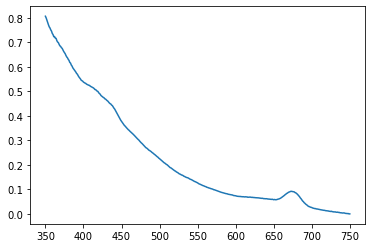

In [38]:
area=np.pi*(np.mean(Diameter)**2)/4
#area mm2
#vol mm3
#area/vol=mm-1
wave=np.arange(750,349,-1)
def ap_ad_single(B1,B2,B3,B4,S1,S2,vol,area):    
    b_tot=np.asarray([B1,B2,B3,B4])
    Mean_blank=np.mean(b_tot,axis=0)
    ap_tot=np.asarray([S1,S2])
    OD_pmean=np.mean(ap_tot,axis=0)
    OD_p=OD_pmean-Mean_blank
    OD_f=OD_p-OD_p[0]
    OD_ps=0.378*OD_f+0.523*(OD_f**2)
    a=2.303*OD_ps*area/vol
    ## Need to notice the unit
    return a
ap=ap_ad_single(apB1,apB2,apB3,apB4,apS1,apS2,vol,area)
plt.plot(wave,ap)

In [39]:
ad=ap_ad_single(adB1,adB2,adB3,adB4,adS1,adS2,vol,area)

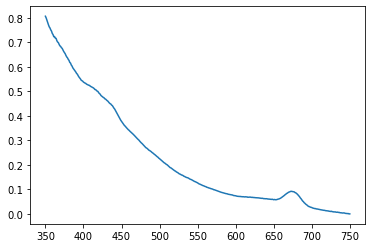

In [40]:
plt.plot(wave,ap)

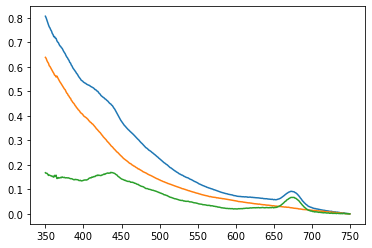

In [41]:
aph=ap-ad
plt.plot(wave,ap)
plt.plot(wave,ad)
plt.plot(wave,aph)